
## **EE769 Introduction to Machine Learning**

### **Assignment 1:- Supervised Learning from Scratch**

Name:- Rajat Dhumale

Roll no:- 210260041

Department:- Engineering Physics



In [22]:
#Importing all necessary libraries
#Importing numpy library used for working with arrays and matrices
import numpy as np

#Importing matplotlib library for visualing data
import matplotlib.pyplot as plt

#Importing time library for working with time
import time

 1. Write a function to generate an input data matrix X of size NxD for regression.

 a) Input: Sample size N and a generator matrix S of size MxD

 b) Working: First generate a random 2-D array of size NxM where each column has a standard normal distribution and is independent of the other columns. Then multiply this with the generator matrix S of size MxD to give an output matrix X of size NxD. The idea here is that if the generator matrix S of size MxD is an identity matrix, then each column of X will remain independent; otherwise we can introduce correlations in the matrix columns of X.

In [23]:
#Defining function of input data matrix X of size NxD for regression with input of sample size N and a generator matrix S of size MxD
def matrix(N,M,D):
  #Generating a random 2-D array of size NxM where each column has a standard normal distribution
  standard_normal_matrix = np.random.standard_normal(size=(N,M))

  #Generator matrix S of size MxD
  S = np.random.rand(M,D)

  #Multiply standard_normal_matrix with matrix S to give an output matrix X of size NxD.
  X = np.dot(standard_normal_matrix, S)
  return X

Lets check this with example.

In [24]:
#Lets take N=2, M=3, D=4 and define 2-D array of size NxM where each column has a standard normal distribution
N=2
M=3
D=4
standard_normal_matrix_1 = np.random.standard_normal(size=(N,M))
print(standard_normal_matrix_1)

[[-0.37713657 -1.02455129  0.16567034]
 [ 0.9456922  -0.88274682  0.54626263]]


In [25]:
#Let generator matrix S of size MxD is an identity matrix and size should be MxM so that we can multiply with standard normal matrix
S_1 = np.random.rand(M,D)
print(S_1)

[[0.37517495 0.98428066 0.3863693  0.70088226]
 [0.49515592 0.69253175 0.87667945 0.36039857]
 [0.83830716 0.93525476 0.34240839 0.87971586]]


In [26]:
#Multiply standard_normal_matrix with matrix S
X_1 = np.dot(standard_normal_matrix_1, S_1)
print(X_1)

[[-0.50992219 -0.92579855 -0.98719013 -0.48783232]
 [ 0.37563859  0.83039107 -0.22145465  0.8252341 ]]


Observation:-

This function takes the sample size N, the number of features M and  D as input and generates the output matrix X as specified in question.


Reference:-

For NumPy Function:-

https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_normal.html
https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html
https://numpy.org/doc/stable/reference/generated/numpy.dot.html

 2. Write a function to generate the target vector t of size Nx1:

 a) Input: Data matrix X of size NxD, weight vector w of size D+1 and noise variance σ

 b) Working: Check for dimension mismatch between X and w, multiply X with w (sans one element) and add the bias (the excluded element), then add zero-mean Gaussian noise with variance σ.

In [27]:
#Defining function to generate the target vector t of size Nx1 with input of Data matrix X of size NxD, weight vector w of size D+1 and noise variance σ
def target_vector(X,w,noise_variance):
  #Checking for dimension mismatch between X and w
  #Since X.shape[1] shows column which is D and w.shape[0] shows row which is D+1 we check condition by
  if X.shape[1] + 1 != w.shape[0]:
    print("Dimension mismatch")

  #Multipling X with w (sans one element) and add the bias (the excluded element), then add zero-mean Gaussian noise with variance σ.
  else:
    #X is the data matrix of size NxD, w is the weight vector of size D+1 (including bias).
    #The multiplication involves taking the dot product of each row of X with the corresponding elements of w, excluding one specific element from w.
    #This exclusion is typically the bias term, which is the first element of the weight vector.
    #After multiplying X with w (sans one element), we add the excluded element (bias) back to the result.
    #Then we add zero-mean Gaussian noise with variance σ
    t = np.dot(X, w[1:]) + w[0] + np.random.normal(0, np.sqrt(noise_variance), (X.shape[0], 1))
    return t

Observation:-

The multiplication data matrix X with the weight vector and the addition of noise variance explains the linear relationship between the input features and the target variable.


Reference:-

For adding zero-mean Gaussian noise with variance σ

https://stackoverflow.com/questions/14058340/adding-noise-to-a-signal-in-python



3. Examine the behavior of the analytical solver based on pseudo-inverse (pinv) in numpy.linalg package with respect to the size of the data matrix. Plot a graph of the time taken with respect to N (use log scale for both axes), with D fixed to 10. Is there any strange behavior in time taken to solve the problem above a particular value of N? What could be the reason for the same?

In [28]:
#The numpy.linalg.pinv function in NumPy is used to compute pseudo-inverse of a matrix
#Defining matrix to generate random matrix of size NxD
def random_matrix(N,D):
  return np.random.rand(N,D)

#Defining function to compute pseudo inverse which takes input matrix X
def pseudo_inverse(X):
  return np.linalg.pinv(X)

In [40]:
#D=10 as per question
D=10

# Varying N and measuring time
N_array = [10, 100, 1000, 10000]
times = []

for N in N_array:
    X = random_matrix(N, D)
    start_time = time.time()
    pinv_func = pseudo_inverse(X)
    end_time = time.time()
    time_taken = end_time - start_time
    times.append(time_taken)

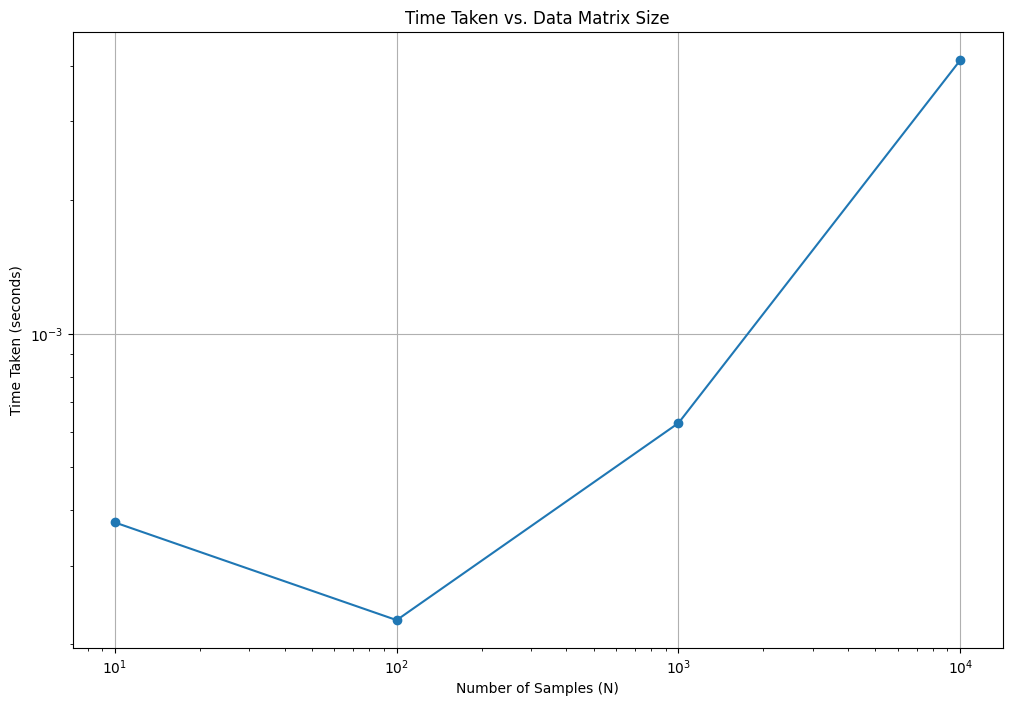

In [41]:
#Visualing by plotting timen takes vs Value of N
#Size of plot
plt.figure(figsize=(12,8))

#Plot of Value of N and time taken using log scale for both axes
plt.loglog(N_array, times, marker='o')

#Title of Plot
plt.title('Time Taken vs. Data Matrix Size')

#X-Label and Y-Label of Plot
plt.xlabel('Number of Samples (N)')
plt.ylabel('Time Taken (seconds)')

plt.grid(True)
plt.show()

Observation:-

The numpy.linalg.pinv function in NumPy is used to compute pseudo-inverse of a matrix. From graph we observe that as value of N increases after N=100 time taken increases. Before N=100 time taken decreases. The reason for such behavior could be related to the computational complexity of the pseudo-inverse operation as value of N increases. As the size of the data matrix increases, memory requirements also increase. If the system runs out of available memory (RAM), it might resort to slower disk-based operations, leading to increased computation time.

References:-

For pinv function

https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html

For using time library, plot the behaviour in time taken vs value of N and to know reason for behavior of time taken vs value of N, I took help of ChatGPT

 4. Write a function to calculate the normalized root mean squared error (NRMSE) between a target vector t and a predicted vector y.

In [42]:
#Defining function to calculate the normalized root mean squared error (NRMSE) between a target vector t and a predicted vector y.
def nrmse(t, y):
  #Root mean square error i given by (∑(t-y)^2/n)^1/2
  rmse = (np.mean((t - y)**2))**0.5

  #Normalized root mean squared error is calculated by dividing RMSE by range of target vector which is given by t_max - t_min
  nrmse_value = rmse/(np.max(t) - np.min(t))
  return nrmse_value

Observation:-

NRMSE values indicate less residual variance for a model. It can also be calculated as RMSE/range. Make sure that the length of the target vector t and the predicted vector y is the same.

References:-

For NRMSE formula

https://www.marinedatascience.co/blog/2019/01/07/normalizing-the-rmse/

For calculating max and min in vector

https://www.geeksforgeeks.org/find-the-maximum-and-minimum-element-in-a-numpy-array/

5. Write a function to calculate gradient of mean squared error (MSE) with respect to weights of linear regression. Figure out what should be the inputs and outputs.

In [43]:
#Defining function to calculate gradient of mean squared error (MSE) with respect to weights of linear regression.
#Gradient of MSE is calculated in reference provided which is -2/n ∑ xi(yi-(mxi+b))
#In matrix form its -2/n X(Transpose)(t-Xw)
def gradient_of_mse(X, t, w):
  #Inputs are X, Data Matrix of NxD, target vector of Nx1, weight vector Dx1
  N = X.shape[0]

  #Let y=X x w
  y = np.dot(X,w)

  #yi-(mxi+b) = actual - predicted = t-y
  #Writing gradient from calculated part
  gradient = -2/N * np.dot(np.transpose(X), (t-y))
  return gradient

Observation:_

The function calculates the gradient by calculating the differences between the predicted values and the true values. Inputs for function are Data Matrix X, traget vector y, and weight vector w. Output is gradient of MSE wrt weights of Linear regression.

References:-

For Gradient Descent of MSE wrt weights of linear regression

https://towardsdatascience.com/gradient-descent-from-scratch-e8b75fa986cc

 6. Write a function to calculate gradient of L2 norm of weights with respect to weights.

In [44]:
#Defining function to calculate gradient of L2 norm of weights with respect to weights.
def gradient_of_l2_norm(w):
  # L2 Norm is given by ||w||2 = (∑(wi)^2)^0.5 which is square root of the sum over all squared weight values of a weight matrix
  # Gradient is given by (d||w||2/dw1,d||w||2/dw2,d||w||2/dw3,....)
  # d||w||2/dwi = wi/||w||2
  # Gradient is (w1/||w||2, w2/||w||2,...)
  # Now writing L2_Norm
  l2_norm = (np.sum(w**2))**0.5

  # Now writing gradient from calculated
  l2_gradient =  w/l2_norm
  return l2_gradient

Observation:-

We know thar L2_Norm is given by ||w||2 = (∑(wi)^2)^0.5 which is square root of the sum over all squared weight values of a weight matrix.

Gradient is given by (d||w||2/dw1,d||w||2/dw2,d||w||2/dw3,....).

d||w||2/dwi = wi/||w||2

Gradient is (w1/||w||2, w2/||w||2,...)

Therefore, following function gives gradient of L2_Norm wrt weights. We also observe that sum of square of all weights in gradient of l2 norm vector equals to 1.

References:-

For intuition of L2_Norm

https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261

7. Write a function to calculate gradient of L1 norm of weights with respect to weights.

In [45]:
#Defining function to calculate gradient of L1 norm of weights with respect to weights.
def gradient_of_l1_norm(w):
  # L1 Norm is given by ||w||1 = ∑|wi| which is sum of absolute of weight values of a weight matrix
  # Gradient is given by (d||w||1/dw1,d||w||1/dw2,d||w||1/dw3,....)
  # d||w||1/dwi = +1 if wi is positive or -1 if wi is negative
  # We can write gradient of L1 Norm using signum function which is +1 for x>0, -1 for x<0 and 0 for x=0.
  l1_gradient = np.sign(w)
  return l1_gradient

Observation:-

L1 Norm is given by ||w||1 = ∑|wi| which is sum of absolute of weight values of a weight matrix.
Gradient is given by (d||w||1/dw1,d||w||1/dw2,d||w||1/dw3,....)

d||w||1/dwi = +1 if wi is positive or -1 if wi is negative.

We can write gradient of L1 Norm using signum function which is +1 for x>0, -1 for x<0 and 0 for x=0.

Therefore, following function gives gradient of L1_Norm wrt weights. We also observe that elements in gradient of L1 norm vector are either 1 or -1.

References:-

For intuition of L1_Norm

https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261

For writing signum function using NumPy

https://numpy.org/doc/stable/reference/generated/numpy.sign.html

 8. Write a function to perform gradient descent on MSE + λ1L1 + λ2L2 for linear regression. Use an appropriate stopping criterion.


In [91]:
#Defining function to calculate gradient descent on MSE + λ1L1 + λ2L2 for linear regression.
#Inputs are Data Matrix X of NxD, target vector t of Nx1, λ1, λ2, learning_rate, epochs which is number of iterations to perform gradient descent
def gradient_descent(X, t, lambda1, lambda2, learning_rate, epochs=1000):
  #Initialising weights to zero
  D = X.shape[1]
  w = np.zeros(D)

  for i in range(epochs):
    #Gradient of MSE from Question No.5
    gradient_mse = gradient_of_mse(X, t, w)

    #Gradient of L2 Norm from Question No.6
    gradient_l2 = gradient_of_l2_norm(w)

    #Gradient of L1 Norm from Question No.7
    gradient_l1 = gradient_of_l1_norm(w)

    #Overall gradient is gradient of MSE + λ1L1 + λ2L2
    gradient = gradient_mse + lambda1*gradient_l1 + lambda2*gradient_l2

    #Gradient Descent on w
    w = w - (learning_rate * gradient)

  return w

Observation:-

Following function computes gradient descent on MSE + λ1L1 + λ2L2. Function inputs are Data Matrix X NxD, target vector t, λ1, λ2, learning_rate, epochs which is number of iterations to perform gradient descent. We initialise weight vector w to zero and then compute gradient using gradient of MSE, L1 Norm, L2 Norm from previous question. Then we update w by

w = w - (learning_rate*gradient).

We repeat this until we get gradient becomes zero. Stopping criterion are decided by learning_rate and epochs which is number of iterations to perform gradient descent. So we choose such value such that gradient becomes zero steadily which depends on learning_rate. Therefore, learning_rate = 0.01
 (somewhere around this value). Also number of iteration should be enough to so that we reach gardient equal zero. Therefore, epochs = 1000 (somewhere around this value).


References:-

For gradient descent

https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931

 9. Examine the impact of σ on the NRMSE for linear regression using gradient descent. Average the results of the following experiment run five times for each value of σ where G is an identity matrix. Generate a random data matrix X and target vector t with noise variance σ, and split it into training
 and validation sub-matrices and sub-vectors. Train using gradient descent on training subset, and test on the validation subset. Plot average NRMSE on validation subset for five runs versus σ. Comment on the results.

In [90]:
#Defining gradient descent of MSE for linear regression
def gradient_descent_of_mse(X, t, learning_rate, max_iterations=1000):
    #Dimension of X
    N = X.shape[0]
    D = X.shape[1]

    # Initializing weights to zeros
    w = np.zeros((D,1))

    for iteration in range(max_iterations):
        # Calculate predicted values
        y = np.dot(X,w)

        # Calculate gradient of MSE
        gradient_mse = -2/N * np.dot(np.transpose(X), (t-y))

        # Update weights using gradients
        w = w-learning_rate * gradient_mse

    return w

#Defining function to see impact of σ on the NRMSE for linear regression using gradient descent
def impact_of_sigma_on_nrmse(sigma_array, experiment_run_time=5):
    nrmse_results = []

    for i in sigma_array:
        #To calculate average later we calculate sum of nrmse
        sum_of_nrmse = 0

        for j in range(experiment_run_time):
            # Generating data
            N = 100
            D = 5

            #Generating random X and w
            X = np.random.rand(N, D)
            w = np.random.rand(D, 1)

            #Writing target vector t. Here i is sigma value
            t = np.dot(X,w) + np.random.normal(0, i, (N, 1))

            #Spliting data
            split_ratio = 0.8
            split_index = int(N * split_ratio)
            X_train, t_train, X_val, t_val = X[:split_index], t[:split_index], X[split_index:], t[split_index:]

            #Training using gradient descent
            learning_rate = 0.01
            w = gradient_descent_of_mse(X_train, t_train, learning_rate)

            #Predict on validation set
            y_predicted = np.dot(X_val,w)

            #Calculating NRMSE from Question No.4
            nrmse_value = nrmse(t_val, y_predicted)
            sum_of_nrmse += nrmse_value

        average_nrmse = sum_of_nrmse/experiment_run_time
        nrmse_results.append(average_nrmse)

    return nrmse_results

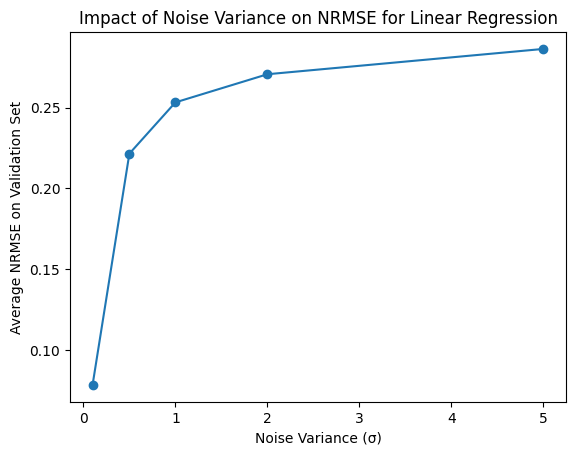

In [79]:
#Taking sigma array
sigma_array = [0.1, 0.5, 1, 2, 5]
nrmse_results = impact_of_sigma_on_nrmse(sigma_array)

# Plotting
plt.plot(sigma_array, nrmse_results, marker='o')

#Title of Plot
plt.title("Impact of Noise Variance on NRMSE for Linear Regression")

#X-Label and Y-Label of plot
plt.xlabel("Noise Variance (σ)")
plt.ylabel("Average NRMSE on Validation Set")
plt.show()

Observation:-

We see as we increase value of sigma(Noise variance) ,Average NRMSE value increases.

References:-

Took help of ChatGPT to understand problem.

 10. Examine the impact of N and λ2 on the NRMSE for linear regression using gradient descent. Create lists of N and λ2 values (use log scale, 5 each, 25 pairs). Average the results of the following experiment run five times for combination of N and λ2 value pair for a fixed generator matrix G and noise variance σ. Comment on the results.

In [99]:
#Defining function for gradient descent of MSE and L2 Norm
def gradient_descent_of_mse_and_l2(X, t, learning_rate, lambda2, max_iterations=1000):
    #Dimension of X
    N = X.shape[0]
    D = X.shape[1]

    #Initializing weights to zeros
    w = np.zeros((D, 1))

    for iteration in range(max_iterations):
        #Calculating predicted values
        y = np.dot(X,w)

        #Calculating gradient of MSE with L2 regularization
        gradient_mse = -2/N * np.dot(np.transpose(X), (t - y))
        gradient_l2 = 2*lambda2*w
        gradient = gradient_mse + gradient_l2

        #Updating weights using gradients
        w = w - learning_rate * gradient

    return w

#Defining function for examining impact of N and λ2 on the NRMSE for linear regression using gradient descent
def impact_of_N_and_lambda2_on_the_nrmse(N_array, lambda2_array, experiment_run_time=5):
    nrmse_results = np.zeros((len(N_array), len(lambda2_array)))

    for i, N in enumerate(N_array):
        for j, lambda2 in enumerate(lambda2_array):
            sum_of_nrmse = 0

            for run in range(experiment_run_time):
                #Generating data
                D = 5

                # Generator matrix G
                G = np.random.rand(D, D)
                X = np.random.rand(N, D)
                w = np.random.rand(D, 1)

                #Let sigma = 0.1
                t = np.dot(X,w) + np.random.normal(0, 0.1, (N, 1))

                #Spliting data
                split_ratio = 0.8
                split_index = int(N * split_ratio)
                X_train, t_train, X_val, t_val = X[:split_index], t[:split_index], X[split_index:], t[split_index:]

                #Training using gradient descent with MSE and L2 regularization
                learning_rate = 0.01
                w = gradient_descent_of_mse_and_l2(X_train, t_train, learning_rate, lambda2)

                #Predicting on validation set
                y_predicted = np.dot(X_val, w)

                #Calculate NRMSE using function in Question No.4
                nrmse_value = nrmse(t_val, y_predicted)
                sum_of_nrmse += nrmse_value

            average_nrmse = sum_of_nrmse/experiment_run_time
            nrmse_results[i, j] = average_nrmse

    return nrmse_results

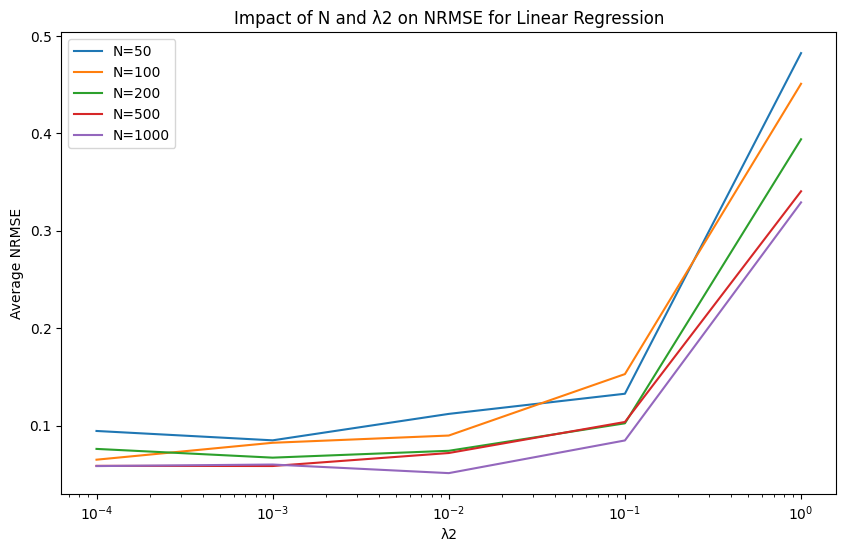

In [102]:
#Taking N_array and lamba2_array
N_array = [50, 100, 200, 500, 1000]  # Number of samples
lambda2_array = [1e-4, 1e-3, 1e-2, 1e-1, 1.0]  # L2 regularization strengths

nrmse_results = impact_of_N_and_lambda2_on_the_nrmse(N_array, lambda2_array)

# Plotting
plt.figure(figsize=(10, 6))
for i, N in enumerate(N_array):
    plt.plot(lambda2_array, nrmse_results[i, :], label=f'N={N}')

#Using log scale, 5 each, 25 pairs
plt.xscale('log')

#Title of Plot
plt.title("Impact of N and λ2 on NRMSE for Linear Regression")

#X-Label and Y-Label of Plot
plt.xlabel("λ2")
plt.ylabel("Average NRMSE")
plt.legend()
plt.show()

Observation:-

From plot we observe that as we increase value of Lambda2, average NRMSE value increases.

References:-

Question was as same as question no 9 and took help of ChatGPT to plot graph using N_array and lambda2_array

11. Examine the impact of λ1 on variable elimination. Generate a single data matrix X and plot weights versus 1/λ1. Comment on the results. Introduce correlations in the columns of X and repeat the experiment. Are the results different? Comment on the results.

In [147]:
#Generating random data matrix of size NxD
def generate_data_matrix(N, D):
    X = np.random.rand(N, D)
    return X

def gradient_descent_of_mse_and_l1(X, t, learning_rate, lambda1, max_iterations=1000, tolerance=1e-6):
    #Dimensionof matrix
    N = X.shape[0]
    D = X.shape[1]

    #Initializing weights to zeros
    w = np.zeros((D, 1))

    for i in range(max_iterations):
        #Calculating predicted values
        y = np.dot(X,w)

        #Calculating gradient of MSE with L1 regularization
        gradient_mse = -2/N * np.dot(np.transpose(X),(t - y))
        gradient_l1 = lambda1 * np.sign(w)
        gradient = gradient_mse + gradient_l1

        # Updating weights using gradients
        w = w - learning_rate * gradient

    return w

def plot_weights_vs_lambda1(X, t, lambda1_values):
    #Dimension of matrix
    N = X.shape[0]
    D = X.shape[1]
    #Initilising weight_array
    weights = []

    for lambda1 in lambda1_values:
        # Perform L1 regularized regression
        w = gradient_descent_of_mse_and_l1(X, t, learning_rate=0.01, lambda1=lambda1)
        weights.append(w.flatten())

    # Plotting 1/lambda1 vs weights
    plt.figure(figsize=(10, 6))
    plt.plot(1/np.array(lambda1_values), np.array(weights))

    #Title
    plt.title("Weights versus 1/λ1")

    #X-Label and Y-Label
    plt.xlabel("1/λ1")
    plt.ylabel("Weights")
    plt.legend([f"Feature {i+1}" for i in range(D)])

    #Using log scale
    plt.xscale('log')
    plt.show()


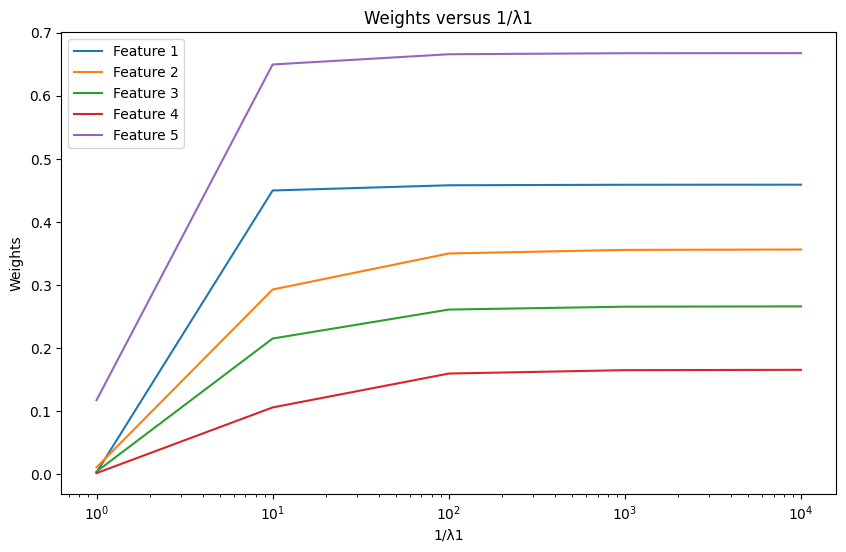

In [148]:
#Let N=100 ,D=5
N = 100
D = 5

#Let lambda1_array be
lambda1_values = [1e-4, 1e-3, 1e-2, 1e-1, 1.0]

#Generating data matrix
X = generate_data_matrix(N, D)

#Generating target vector
w = np.random.rand(D, 1)
t = np.dot(X,w) + np.random.normal(0, 0.1, (N, 1))

# Plot weights versus 1/lambda1
plot_weights_vs_lambda1(X, t, lambda1_values)

Observation:-

From graph we observe that as 1/lambda value increases , value of weight increases for different features.

References:-

Question was similar to last question and took help of ChatGPT

12. Show the grouping effect of elastic net on correlated columns of X.

Didnt understand this question so.

13. Write a function for generating linear binary classification vector t with noise variance σ.

In [9]:
#Defining function for generating linear binary classification vector t with noise variance σ.
def binary_classification_vector(N, D, sigma):
  # Generate random data matrix X
  X = np.random.rand(N, D)

  # Generate random weights for the linear model
  w = np.random.rand(D, 1)

  #Writing vector t as w(transpose)X+ b(noise)
  t = np.dot(X,w) + np.random.normal(0, sigma, (N, 1)) >= 0

  return t.astype(int)

Observation:- Following function computes binary classification vector which returs vectors with classified labels as 0 or 1.

References:- I took help of ChatGPT to understand how we can write binary classification vector.

 14. Write a function for computing gradient of binary cross-entropy for logistic regression.

In [7]:
#Defining function for computing gradient of binary cross-entropy for logistic regression.
#Inputs for function are data matrix X of NxD, target vector y of Nx1 and weight vector of Dx1
def gradient_of_binary_cross_entropy(X, y, w):
  #Computing N
  N = X.shape[0]

  #Writing z =  w(transpose)X
  z = np.dot(X,w)

  #Computing y_predicted which is given by 1/1+exp(-z) where z = w0 + w1x1 + w2x2 + .... wkxk = w(transpose)X
  y_predicted = 1/(1+np.exp(-z))

  #Computing gradient which is equal to 1/N *(y_predicted - t)X
  gradient = 1/N * (np.dot(np.transpose(X), (y_predicted-y)))
  return gradient

Observation:-

Following function computes gradient of binary cross-entropy for logistic regression of shape Dx1. Computation of gradient of binary cross entropy is explained in reference link.

References:-

For computing gradient of binary cross-entropy for logistic regression.

https://www.python-unleashed.com/post/derivation-of-the-binary-cross-entropy-loss-gradient

 15. Repeat experiment 10 for binary classification.

In [135]:
#Defing sigmoid function as 1/1+exp(-z)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#Defining function for gradient descent of MSE and L2 Norm
def gradient_descent_binary_classification(X, t, learning_rate, lambda2, max_iterations=1000, tolerance=1e-6):
    #Dimension of matrix X
    N= X.shape[0]
    D= X.shape[1]
    #Initializing weights to zeros
    w = np.zeros((D, 1))

    for iteration in range(max_iterations):
        #Calculating predicted probabilities using sigmoid
        y = sigmoid(X.dot(w))

        #Calculating gradient of binary cross-entropy loss with L2 regularization
        gradient_mse = -2/N * X.T.dot(t - y)
        gradient_l2 = 2 * lambda2 * w
        gradient = gradient_mse + gradient_l2

        #Updating weights using gradients
        w = w-learning_rate * gradient
    return w

def binary_classification(N_values, lambda2_values, experiment_run_time=5):
    nrmse_results = np.zeros((len(N_values), len(lambda2_values)))

    for i, N in enumerate(N_values):
        for j, lambda2 in enumerate(lambda2_values):
            sum_of_nrmse = 0

            for run in range(experiment_run_time=5):
                #Generating data
                D = 5

                #Generator matrix G
                G = np.random.rand(D, D)
                X = np.random.rand(N, D)
                w = np.random.rand(D, 1)
                linear_response = np.dot(X,w)

                #Classifing labels 0 or 1
                t = (sigmoid(linear_response) >= 0.5).astype(int)

                #Spliting data
                split_ratio = 0.8
                split_index = int(N * split_ratio)
                X_train, t_train, X_val, t_val = X[:split_index], t[:split_index], X[split_index:], t[split_index:]

                #Training using gradient descent with L2 regularization
                learning_rate = 0.01
                w = gradient_descent_binary_classification(X_train, t_train, learning_rate, lambda2)

                #Predicting on validation set
                y_prob = sigmoid(np.dot(X_val,w))

                # Calculate NRMSE for binary classification using nrmse function from Question No.4
                nrmse_value = nrmse(t_val, y_prob)
                sum_of_nrmse += nrmse_value

            average_nrmse = sum_of_nrmse/experiment_run_time
            nrmse_results[i, j] = average_nrmse

    return nrmse_results

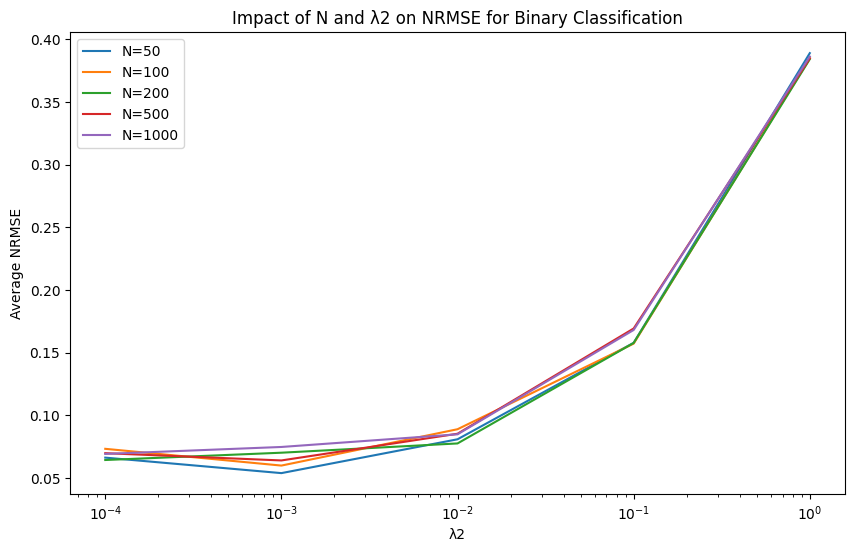

In [134]:
#Taking N_array and lambda2_array
N_array = [50, 100, 200, 500, 1000]
lambda2_array = [1e-4, 1e-3, 1e-2, 1e-1, 1.0]

nrmse_results_binary_classification = binary_classification(N_array, lambda2_array)

#Plotting
plt.figure(figsize=(10, 6))
for i, N in enumerate(N_array):
    plt.plot(lambda2_array, nrmse_results_binary_classification[i, :], label=f'N={N}')

#Using log scale
plt.xscale('log')
plt.title("Impact of N and λ2 on NRMSE for Binary Classification")

#X-label and Y-label
plt.xlabel("λ2")
plt.ylabel("Average NRMSE")
plt.legend()
plt.show()

Observation:-

From graph we observe that as we increase value of lambda2, average NRMSE value increases.

References:-

Question was same as question no. 10 and used concepts used in question no.14 and help of ChatGPT.